Epoch:    0, Loss = 8.148e+01
Epoch:    1, Loss = 1.980e-02
Epoch:    2, Loss = 1.279e-02
Epoch:    3, Loss = 1.280e-02
Epoch:    4, Loss = 1.280e-02
Epoch:    5, Loss = 1.280e-02
Epoch:    6, Loss = 1.280e-02
Epoch:    7, Loss = 1.280e-02
Epoch:    8, Loss = 1.280e-02
Epoch:    9, Loss = 1.280e-02
Epoch:   10, Loss = 1.280e-02
Epoch:   11, Loss = 1.280e-02
Epoch:   12, Loss = 1.280e-02
Epoch:   13, Loss = 1.280e-02
Epoch:   14, Loss = 1.280e-02
Epoch:   15, Loss = 1.280e-02
Epoch:   16, Loss = 1.280e-02
Epoch:   17, Loss = 1.280e-02
Epoch:   18, Loss = 1.280e-02
Epoch:   19, Loss = 1.280e-02
Epoch:   20, Loss = 1.280e-02
Epoch:   21, Loss = 1.280e-02
Epoch:   22, Loss = 1.280e-02
Epoch:   23, Loss = 1.280e-02
Epoch:   24, Loss = 1.280e-02
Epoch:   25, Loss = 1.280e-02
Epoch:   26, Loss = 1.280e-02
Epoch:   27, Loss = 1.280e-02
Epoch:   28, Loss = 1.280e-02
Epoch:   29, Loss = 1.280e-02
Epoch:   30, Loss = 1.280e-02
Epoch:   31, Loss = 1.280e-02
Epoch:   32, Loss = 1.280e-02
Epoch:   3

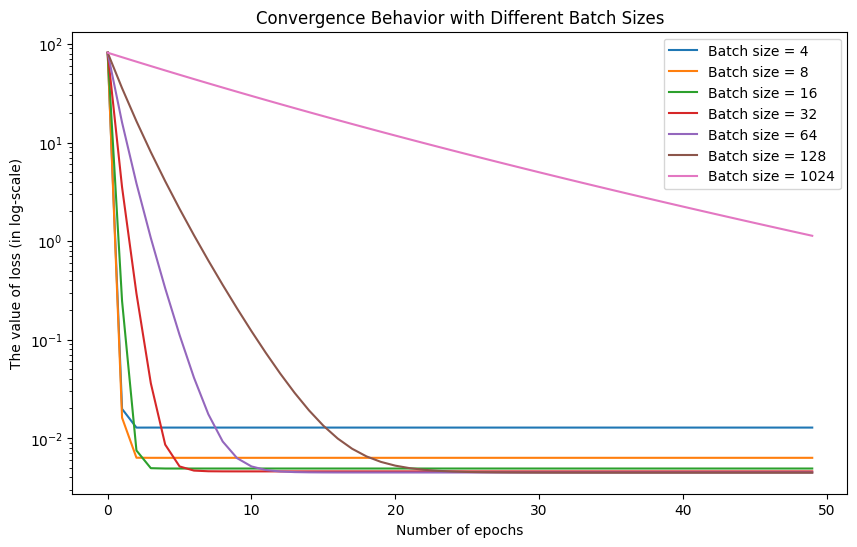

In [15]:
# Mini Batch Stochastic Gradient Descent Scheme And Testing Convergence with Different Mini Batch Sizes

import numpy as np
from numpy import linalg as la
import random
import matplotlib.pyplot as plt

def divide_into_batches(x, y, batch_size): 
    indices = list(range(len(x)))
    random.shuffle(indices)
    batches_x = [x[indices[i:i+batch_size]] for i in range(0, len(indices), batch_size)]
    batches_y = [y[indices[i:i+batch_size]] for i in range(0, len(indices), batch_size)]
    return batches_x, batches_y

def learning_rate_schedule(epoch, initial_lr=0.01, decay_rate=0.1, decay_steps=1000):
    return initial_lr * decay_rate ** (epoch / decay_steps)

def SGD(X, y, beta0, eta=0.01, n_b=1, n_ep=50, tol=1e-3, batch_size=100):
    n, p = X.shape
    beta_t = beta0
    fx_lst = []
    
    batches_X, batches_y = divide_into_batches(X, y, batch_size)
    
    for t in range(n_ep):
        f_val = (0.5/n)*la.norm(X.dot(beta_t) - y)**2
        fx_lst.append(f_val)
        
        print("Epoch: {0:4d},".format(t), "Loss = {0:6.3e}".format(f_val))
        
        eta_t = 0.01
        
        for i in range(len(batches_X)): 
            X_b, y_b = batches_X[i], batches_y[i]
            res = X_b.dot(beta_t) - y_b
            df_t = (1/n_b) * np.matmul(X_b.T, res)
        
            beta_t = beta_t - eta_t * df_t
        
    return beta_t, f_val, fx_lst

n, p = 5000, 500
X = np.random.randn(n, p)
beta_s = np.random.rand(p)
y = X.dot(beta_s) + 0.1 * np.random.randn(n)
beta0 = np.zeros(p)
n_epochs = 50

batch_sizes = [4, 8, 16, 32, 64, 128, 1024]

results = []
for batch_size in batch_sizes:
    beta_t, f_val, fx_lst = SGD(X, y, beta0, eta=0.05, n_b=batch_size, n_ep=n_epochs, tol=1e-8, batch_size=batch_size)
    results.append((beta_t, fx_lst))

plt.figure(figsize=(10, 6))
for i, (batch_size, (_, fx_lst)) in enumerate(zip(batch_sizes, results)):
    plt.semilogy(fx_lst, label=f"Batch size = {batch_size}")
plt.legend()
plt.xlabel("Number of epochs")
plt.ylabel("The value of loss (in log-scale)")
plt.title("Convergence Behavior with Different Batch Sizes")
plt.show()

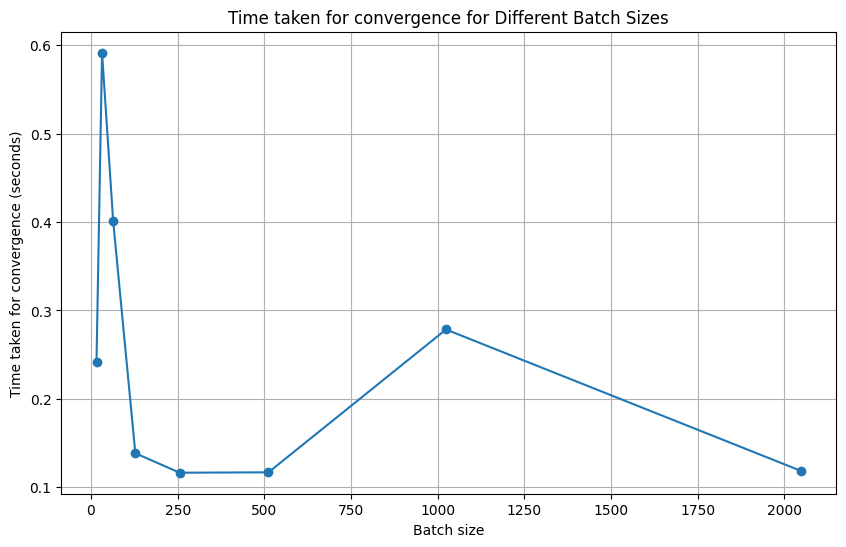

In [20]:
# Mini Batch Stochastic Gradient Descent Scheme And Testing Time to Converge with Different Mini Batch Sizes

import numpy as np
import random
import matplotlib.pyplot as plt
import time

def divide_into_batches(x, y, batch_size): 
    indices = list(range(len(x)))
    random.shuffle(indices)
    batches_x = [x[indices[i:i+batch_size]] for i in range(0, len(indices), batch_size)]
    batches_y = [y[indices[i:i+batch_size]] for i in range(0, len(indices), batch_size)]
    return batches_x, batches_y

def SGD(X, y, beta0, eta=0.01, n_b=1, n_ep=50, tol=1e-3, batch_size=100):
    n, p = X.shape
    beta_t = beta0
    
    start_time = time.time()
    
    batches_X, batches_y = divide_into_batches(X, y, batch_size)
    
    for t in range(n_ep):
        for i in range(len(batches_X)): 
            X_b, y_b = batches_X[i], batches_y[i]
            res = X_b.dot(beta_t) - y_b
            df_t = (1/n_b) * np.matmul(X_b.T, res)
        
            beta_t = beta_t - eta * df_t
    
    end_time = time.time()
    
    duration = end_time - start_time
    
    return duration

n, p = 5000, 500
X = np.random.randn(n, p)
beta_s = np.random.rand(p)
y = X.dot(beta_s) + 0.1 * np.random.randn(n)
beta0 = np.zeros(p)
n_epochs = 50

batch_sizes = [16, 32, 64, 128, 256, 512, 1024, 2048]

times_taken = []
for batch_size in batch_sizes:
    duration = SGD(X, y, beta0, eta=0.05, n_b=batch_size, n_ep=n_epochs, tol=1e-8, batch_size=batch_size)
    times_taken.append(duration)

plt.figure(figsize=(10, 6))
plt.plot(batch_sizes, times_taken, marker='o')
plt.xlabel("Batch size")
plt.ylabel("Time taken for convergence (seconds)")
plt.title("Time taken for convergence for Different Batch Sizes")
plt.grid(True)
plt.show()




Epoch:    0, Loss = 2.550e+04 Distance = 0.000e+00
Epoch:    1, Loss = 2.290e+04 Distance = 1.128e+01
Epoch:    2, Loss = 2.059e+04 Distance = 2.190e+01
Epoch:    3, Loss = 1.853e+04 Distance = 3.190e+01
Epoch:    4, Loss = 1.671e+04 Distance = 4.133e+01
Epoch:    5, Loss = 1.507e+04 Distance = 5.022e+01
Epoch:    6, Loss = 1.362e+04 Distance = 5.860e+01
Epoch:    7, Loss = 1.232e+04 Distance = 6.652e+01
Epoch:    8, Loss = 1.115e+04 Distance = 7.400e+01
Epoch:    9, Loss = 1.011e+04 Distance = 8.106e+01
Epoch:   10, Loss = 9.173e+03 Distance = 8.774e+01
Epoch:   11, Loss = 8.333e+03 Distance = 9.405e+01
Epoch:   12, Loss = 7.578e+03 Distance = 1.000e+02
Epoch:   13, Loss = 6.899e+03 Distance = 1.057e+02
Epoch:   14, Loss = 6.288e+03 Distance = 1.110e+02
Epoch:   15, Loss = 5.736e+03 Distance = 1.161e+02
Epoch:   16, Loss = 5.239e+03 Distance = 1.209e+02
Epoch:   17, Loss = 4.789e+03 Distance = 1.255e+02
Epoch:   18, Loss = 4.382e+03 Distance = 1.298e+02
Epoch:   19, Loss = 4.014e+03 D

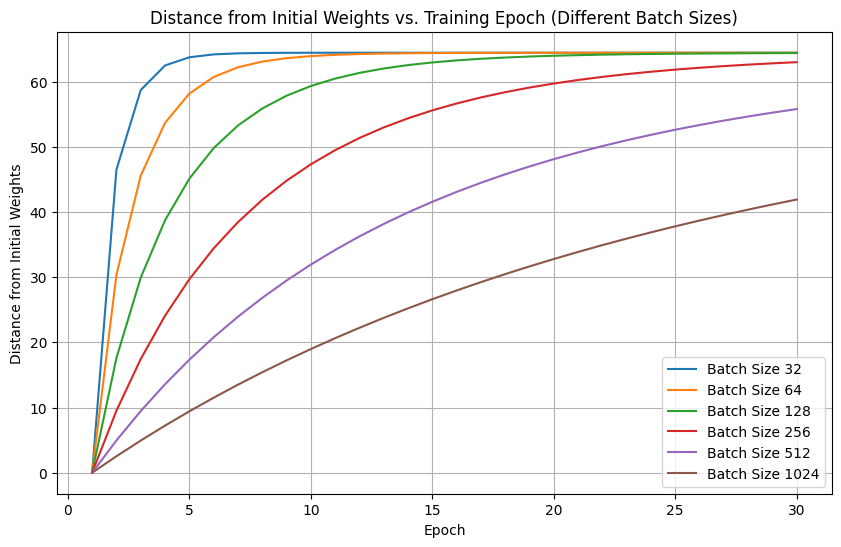

In [17]:
# Calculating Distance from Initial Beta Throughout Iterations for Different Batch Sizes 
import numpy as np
from numpy import linalg as la
import random
import matplotlib.pyplot as plt

def divide_into_batches(x, y, batch_size): 
    indices = list(range(len(x)))
    random.shuffle(indices)
    batches_x = [x[indices[i:i+batch_size]] for i in range(0, len(indices), batch_size)]
    batches_y = [y[indices[i:i+batch_size]] for i in range(0, len(indices), batch_size)]
    return batches_x, batches_y

def learning_rate_schedule(epoch, initial_lr=0.01, decay_rate=0.1, decay_steps=1000):
    return initial_lr * decay_rate ** (epoch / decay_steps)

def SGD(X, y, beta0, eta=0.01, n_b=1, n_ep=50, tol=1e-3, batch_size=100):
    n, p = X.shape
    beta_t = beta0
    fx_lst = []
    distance_lst = [] 
    
    batches_X, batches_y = divide_into_batches(X, y, batch_size)
    
    for t in range(n_ep):
        f_val = (0.5/n)*la.norm(X.dot(beta_t) - y)**2
        fx_lst.append(f_val)
        
        distance = calculate_l2_distance(beta0, beta_t)
        distance_lst.append(distance)
        
        print("Epoch: {0:4d},".format(t), "Loss = {0:6.3e}".format(f_val), "Distance = {0:6.3e}".format(distance))
        
        eta_t = learning_rate_schedule(t)
        
        for i in range(len(batches_X)): 
            X_b, y_b = batches_X[i], batches_y[i]
            res = X_b.dot(beta_t) - y_b
            df_t = (1/n_b) * np.matmul(X_b.T, res)
        
            beta_t = beta_t - eta_t * df_t
    
    return beta_t, fx_lst, distance_lst

def calculate_l2_distance(initial_weights, final_weights):
    return la.norm(final_weights - initial_weights)

n, p = 5000, 500
X = np.random.randn(n, p)
beta_s = np.random.randn(p) * 10 
y = X.dot(beta_s) + 0.1 * np.random.randn(n) 
beta0 = np.zeros(p)
n_epochs = 30 


initial_weights, _, _ = SGD(X, y, beta0, eta=0.05, n_b=1024, n_ep=n_epochs, tol=1e-8, batch_size=64)


batch_sizes = [32, 64, 128, 256, 512, 1024]
distance_lists = []

for batch_size in batch_sizes:
    _, _, distance_lst = SGD(X, y, initial_weights, eta=0.05, n_b=batch_size, n_ep=n_epochs, tol=1e-8, batch_size=batch_size)
    distance_lists.append(distance_lst)

_, _, distance_lst_512 = SGD(X, y, initial_weights, eta=0.20, n_b=1024, n_ep=n_epochs, tol=1e-8, batch_size=512)

plt.figure(figsize=(10, 6))
for i, batch_size in enumerate(batch_sizes):
    plt.plot(range(1, n_epochs + 1), distance_lists[i], label='Batch Size {}'.format(batch_size))
plt.xlabel('Epoch')
plt.ylabel('Distance from Initial Weights')
plt.title('Distance from Initial Weights vs. Training Epoch (Different Batch Sizes)')
plt.legend()
plt.grid(True)
plt.show()

Epoch:    0, Loss = 2.594e+04 Distance = 0.000e+00
Epoch:    1, Loss = 1.518e+04 Distance = 5.141e+01
Epoch:    2, Loss = 9.090e+03 Distance = 9.006e+01
Epoch:    3, Loss = 5.563e+03 Distance = 1.194e+02
Epoch:    4, Loss = 3.477e+03 Distance = 1.418e+02
Epoch:    5, Loss = 2.218e+03 Distance = 1.591e+02
Epoch:    6, Loss = 1.441e+03 Distance = 1.725e+02
Epoch:    7, Loss = 9.522e+02 Distance = 1.830e+02
Epoch:    8, Loss = 6.391e+02 Distance = 1.913e+02
Epoch:    9, Loss = 4.349e+02 Distance = 1.978e+02
Epoch:   10, Loss = 2.995e+02 Distance = 2.031e+02
Epoch:   11, Loss = 2.086e+02 Distance = 2.073e+02
Epoch:   12, Loss = 1.466e+02 Distance = 2.106e+02
Epoch:   13, Loss = 1.039e+02 Distance = 2.134e+02
Epoch:   14, Loss = 7.420e+01 Distance = 2.156e+02
Epoch:   15, Loss = 5.333e+01 Distance = 2.175e+02
Epoch:   16, Loss = 3.855e+01 Distance = 2.189e+02
Epoch:   17, Loss = 2.800e+01 Distance = 2.202e+02
Epoch:   18, Loss = 2.044e+01 Distance = 2.212e+02
Epoch:   19, Loss = 1.497e+01 D

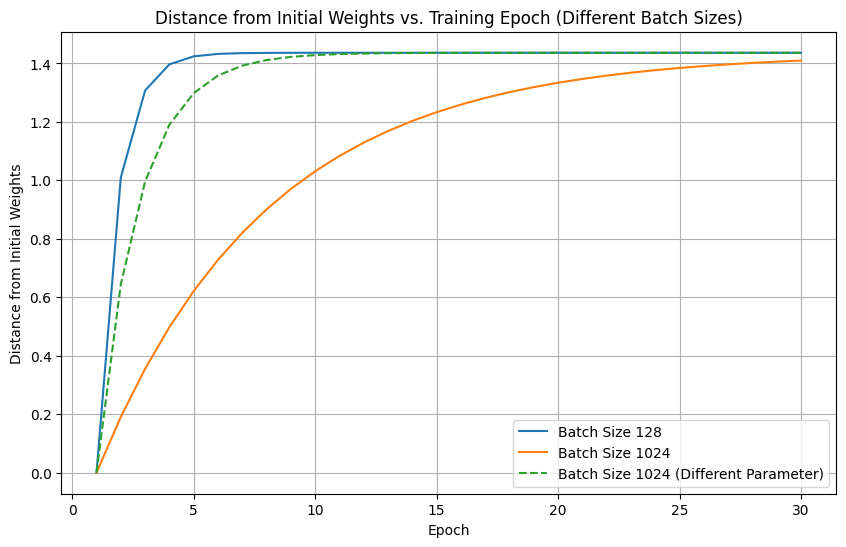

In [18]:
# Calculating Distance from Initial Beta Throughout Iterations for Different Batch Sizes with Increased Learning Rate for Higher Batch Sizes
import numpy as np
from numpy import linalg as la
import random
import matplotlib.pyplot as plt

def divide_into_batches(x, y, batch_size): 
    indices = list(range(len(x)))
    random.shuffle(indices)
    batches_x = [x[indices[i:i+batch_size]] for i in range(0, len(indices), batch_size)]
    batches_y = [y[indices[i:i+batch_size]] for i in range(0, len(indices), batch_size)]
    return batches_x, batches_y

def learning_rate_schedule(epoch, initial_lr=0.01, decay_rate=0.1, decay_steps=1000):
    return initial_lr * decay_rate ** (epoch / decay_steps)

def SGD(X, y, beta0, eta, n_b=1, n_ep=50, tol=1e-3, batch_size=100):
    n, p = X.shape
    beta_t = beta0
    fx_lst = []
    distance_lst = []  
    
    batches_X, batches_y = divide_into_batches(X, y, batch_size)
    
    for t in range(n_ep):
        f_val = (0.5/n)*la.norm(X.dot(beta_t) - y)**2
        fx_lst.append(f_val)
        
        distance = calculate_l2_distance(beta0, beta_t)
        distance_lst.append(distance)
        
        print("Epoch: {0:4d},".format(t), "Loss = {0:6.3e}".format(f_val), "Distance = {0:6.3e}".format(distance))
        
        eta_t = eta
        
        for i in range(len(batches_X)): 
            X_b, y_b = batches_X[i], batches_y[i]
            res = X_b.dot(beta_t) - y_b
            df_t = (1/n_b) * np.matmul(X_b.T, res)
        
            beta_t = beta_t - eta_t * df_t
    
    return beta_t, fx_lst, distance_lst

def calculate_l2_distance(initial_weights, final_weights):
    return la.norm(final_weights - initial_weights)

n, p = 5000, 500
X = np.random.randn(n, p)
beta_s = np.random.randn(p) * 10  
y = X.dot(beta_s) + 0.1 * np.random.randn(n) 
beta0 = np.zeros(p)
n_epochs = 30  

initial_weights, _, _ = SGD(X, y, beta0, eta=0.05, n_b=1024, n_ep=n_epochs, tol=1e-8, batch_size=64)

batch_sizes = [128, 1024]
distance_lists = []

for batch_size in batch_sizes:
    _, _, distance_lst = SGD(X, y, initial_weights, eta=0.05, n_b=batch_size, n_ep=n_epochs, tol=1e-8, batch_size=batch_size)
    distance_lists.append(distance_lst)

_, _, distance_lst_512 = SGD(X, y, initial_weights, eta=0.20, n_b=1024, n_ep=n_epochs, tol=1e-8, batch_size=512)
plt.figure(figsize=(10, 6))
for i, batch_size in enumerate(batch_sizes):
    plt.plot(range(1, n_epochs + 1), distance_lists[i], label='Batch Size {}'.format(batch_size))
plt.plot(range(1, n_epochs + 1), distance_lst_512, label='Batch Size 1024 (Different Parameter)'.format(batch_size), linestyle='--') 
plt.xlabel('Epoch')
plt.ylabel('Distance from Initial Weights')
plt.title('Distance from Initial Weights vs. Training Epoch (Different Batch Sizes)')
plt.legend()
plt.grid(True)
plt.show()


Epoch:    0, Loss = 9.260e+01
Epoch:    1, Loss = 2.471e+00
Epoch:    2, Loss = 2.013e-01
Epoch:    3, Loss = 2.538e-02
Epoch:    4, Loss = 7.097e-03
Epoch:    5, Loss = 4.915e-03
Epoch:    6, Loss = 4.631e-03
Epoch:    7, Loss = 4.591e-03
Epoch:    8, Loss = 4.584e-03
Epoch:    9, Loss = 4.583e-03
Epoch:   10, Loss = 4.582e-03
Epoch:   11, Loss = 4.581e-03
Epoch:   12, Loss = 4.580e-03
Epoch:   13, Loss = 4.579e-03
Epoch:   14, Loss = 4.578e-03
Epoch:   15, Loss = 4.578e-03
Epoch:   16, Loss = 4.577e-03
Epoch:   17, Loss = 4.576e-03
Epoch:   18, Loss = 4.575e-03
Epoch:   19, Loss = 4.575e-03
Epoch:   20, Loss = 4.574e-03
Epoch:   21, Loss = 4.573e-03
Epoch:   22, Loss = 4.572e-03
Epoch:   23, Loss = 4.571e-03
Epoch:   24, Loss = 4.571e-03
Epoch:   25, Loss = 4.570e-03
Epoch:   26, Loss = 4.569e-03
Epoch:   27, Loss = 4.568e-03
Epoch:   28, Loss = 4.568e-03
Epoch:   29, Loss = 4.567e-03
Epoch:    0, Loss = 9.260e+01
Epoch:    1, Loss = 8.307e+01
Epoch:    2, Loss = 7.462e+01
Epoch:    

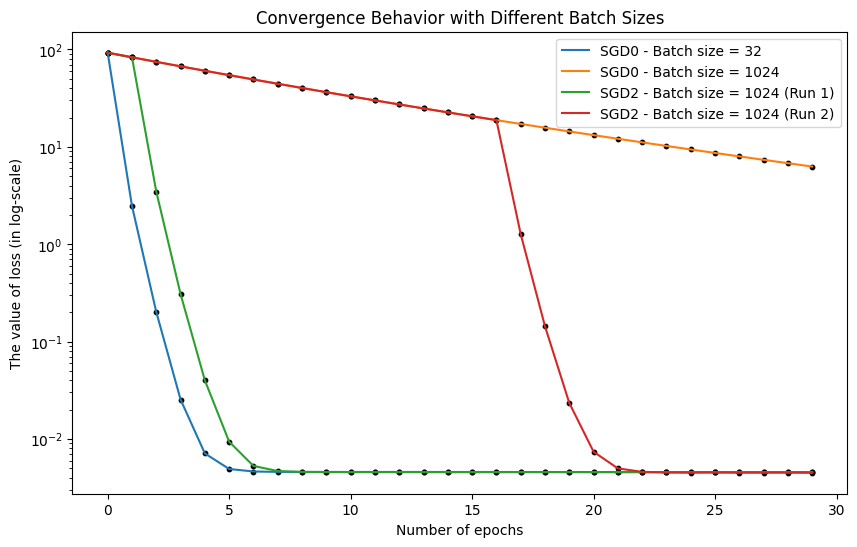

In [19]:
# Testing Convergence Behavior on Larger Batch Sizes that Switch to Smaller Batch Sizes Throughout Iterations
import numpy as np
from numpy import linalg as la
import random
import matplotlib.pyplot as plt

def divide_into_batches(x, y, batch_size): 
    indices = list(range(len(x)))
    random.shuffle(indices)
    batches_x = [x[indices[i:i+batch_size]] for i in range(0, len(indices), batch_size)]
    batches_y = [y[indices[i:i+batch_size]] for i in range(0, len(indices), batch_size)]
    return batches_x, batches_y

def learning_rate_schedule(epoch, initial_lr=0.01, decay_rate=0.1, decay_steps=1000):
    return initial_lr * decay_rate ** (epoch / decay_steps)

def SGD0(X, y, beta0, eta=0.01, n_b=1, n_ep=60, tol=1e-3, batch_size=100):
    n, p = X.shape
    beta_t = beta0
    fx_lst = []
    
    batches_X, batches_y = divide_into_batches(X, y, 1024)
    
    for t in range(n_ep):
        f_val = (0.5/n)*la.norm(X.dot(beta_t) - y)**2
        fx_lst.append(f_val)
        
        print("Epoch: {0:4d},".format(t), "Loss = {0:6.3e}".format(f_val))
        
        eta_t = learning_rate_schedule(t)
        
        for i in range(len(batches_X)): 
            X_b, y_b = batches_X[i], batches_y[i]
            res = X_b.dot(beta_t) - y_b
            df_t = (1/n_b) * np.matmul(X_b.T, res)
        
            beta_t = beta_t - eta_t * df_t

    return beta_t, f_val, fx_lst

def SGD1(X, y, beta0, eta=0.01, n_b=1, n_ep=60, tol=1e-3, batch_size=100):
    n, p = X.shape
    beta_t = beta0
    fx_lst = []
    
    batches_X, batches_y = divide_into_batches(X, y, 1024)
    
    for t in range(n_ep):
        if t == 0:
            batches_X, batches_y = divide_into_batches(X, y, 1024)
            n_b = 1024
        elif t == 1:
            batches_X, batches_y = divide_into_batches(X, y, 32)
            n_b = 32
        
        f_val = (0.5/n)*la.norm(X.dot(beta_t) - y)**2
        fx_lst.append(f_val)
        
        print("Epoch: {0:4d},".format(t), "Loss = {0:6.3e}".format(f_val))
        
        eta_t = learning_rate_schedule(t)
        
        for i in range(len(batches_X)): 
            X_b, y_b = batches_X[i], batches_y[i]
            res = X_b.dot(beta_t) - y_b
            df_t = (1/n_b) * np.matmul(X_b.T, res)
        
            beta_t = beta_t - eta_t * df_t

    return beta_t, f_val, fx_lst

def SGD2(X, y, beta0, eta=0.01, n_b=1, n_ep=60, tol=1e-3, batch_size=100):
    n, p = X.shape
    beta_t = beta0
    fx_lst = []
    
    batches_X, batches_y = divide_into_batches(X, y, 1024)
    
    for t in range(n_ep):
        if t <= 15:
            batches_X, batches_y = divide_into_batches(X, y, 1024)
            n_b = 1024
        else:
            batches_X, batches_y = divide_into_batches(X, y, 32)
            n_b = 32
        
        f_val = (0.5/n)*la.norm(X.dot(beta_t) - y)**2
        fx_lst.append(f_val)
        
        print("Epoch: {0:4d},".format(t), "Loss = {0:6.3e}".format(f_val))
        
        eta_t = learning_rate_schedule(t)
        
        for i in range(len(batches_X)): 
            X_b, y_b = batches_X[i], batches_y[i]
            res = X_b.dot(beta_t) - y_b
            df_t = (1/n_b) * np.matmul(X_b.T, res)
        
            beta_t = beta_t - eta_t * df_t

    return beta_t, f_val, fx_lst



n, p = 5000, 500
X = np.random.randn(n, p)
beta_s = np.random.rand(p)
y = X.dot(beta_s) + 0.1 * np.random.randn(n)
beta0 = np.zeros(p)
n_epochs = 50

batch_sizes = [32, 1024]

results = []
for batch_size in batch_sizes:
    beta_t, f_val, fx_lst = SGD0(X, y, beta0, eta=0.05, n_b=batch_size, n_ep=30, tol=1e-8, batch_size=batch_size)
    results.append((beta_t, fx_lst))

beta_t, f_val, fx_lst = SGD1(X, y, beta0, eta=0.05, n_b=1024, n_ep=30, tol=1e-8, batch_size=1024)
results.append((beta_t, fx_lst))

beta_t, f_val, fx_lst = SGD2(X, y, beta0, eta=0.05, n_b=1024, n_ep=30, tol=1e-8, batch_size=1024)
results.append((beta_t, fx_lst))

plt.figure(figsize=(10, 6))
for i, (batch_size, (_, fx_lst)) in enumerate(zip(batch_sizes, results[:-2])):
    plt.semilogy(fx_lst, label=f"SGD0 - Batch size = {batch_size}")
    
plt.semilogy(results[-2][1], label="SGD2 - Batch size = 1024 (Run 1)")
plt.semilogy(results[-1][1], label="SGD2 - Batch size = 1024 (Run 2)")

# Add data points as dots on the lines
for i, (_, fx_lst) in enumerate(results):
    plt.scatter(range(len(fx_lst)), fx_lst, color='black', s=10)

plt.legend()
plt.xlabel("Number of epochs")
plt.ylabel("The value of loss (in log-scale)")
plt.title("Convergence Behavior with Different Batch Sizes")
plt.show()
